In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('churn/Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
dataset.isnull().any().any()

False

In [4]:
dataset.drop('RowNumber',axis=1,inplace=True)

In [5]:
dataset.drop('CustomerId',axis=1,inplace=True)

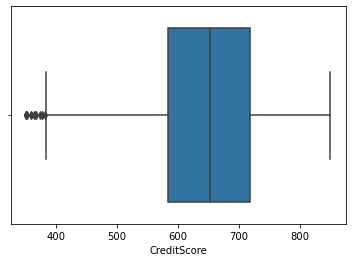

In [6]:
sns.boxplot(dataset['CreditScore'])

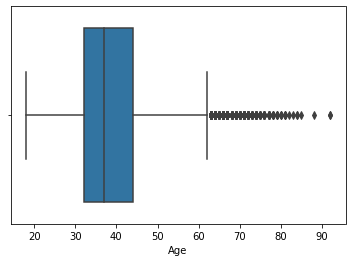

In [7]:
sns.boxplot(dataset['Age'])

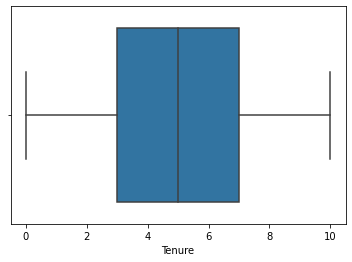

In [8]:
sns.boxplot(dataset['Tenure'])

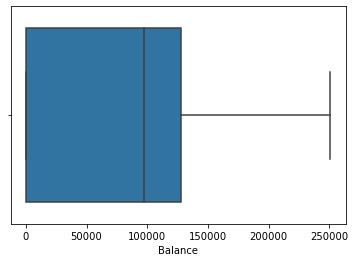

In [9]:
sns.boxplot(dataset['Balance'])

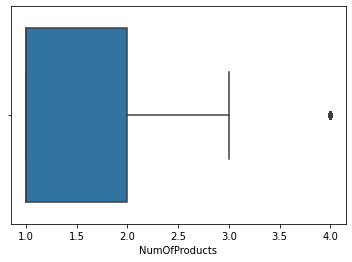

In [10]:
sns.boxplot(dataset['NumOfProducts'])

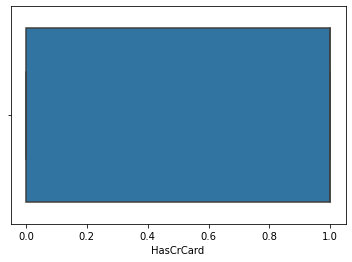

In [11]:
sns.boxplot(dataset['HasCrCard'])

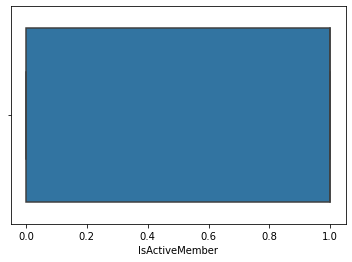

In [12]:
sns.boxplot(dataset['IsActiveMember'])

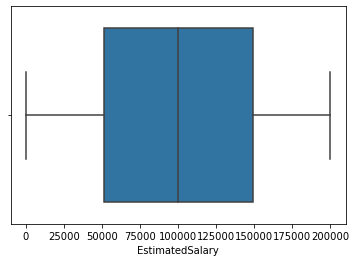

In [13]:
sns.boxplot(dataset['EstimatedSalary'])

In [14]:
Q1=dataset.quantile(0.25)
Q1

CreditScore          584.00
Age                   32.00
Tenure                 3.00
Balance                0.00
NumOfProducts          1.00
HasCrCard              0.00
IsActiveMember         0.00
EstimatedSalary    51002.11
Exited                 0.00
Name: 0.25, dtype: float64

In [15]:
Q3=dataset.quantile(0.75)
Q3

CreditScore           718.0000
Age                    44.0000
Tenure                  7.0000
Balance            127644.2400
NumOfProducts           2.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary    149388.2475
Exited                  0.0000
Name: 0.75, dtype: float64

In [16]:
IQR=Q3-Q1
IQR

CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [17]:
dataset=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]
dataset

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [18]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [19]:
dataset.drop('Surname',axis=1,inplace=True)

C:\Users\vipvi\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [21]:
lb=LabelEncoder()
dataset['Geography']=lb.fit_transform(dataset['Geography'])

<ipython-input-21-6106fba15385>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Geography']=lb.fit_transform(dataset['Geography'])


In [22]:
x=dataset.iloc[:,0:10]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10
6,822,0,Male,50,7,0.00,2,1,1,10062.80
8,501,0,Male,44,4,142051.07,2,0,1,74940.50
...,...,...,...,...,...,...,...,...,...,...
9993,644,0,Male,28,7,155060.41,1,1,0,29179.52
9994,800,0,Female,29,2,0.00,2,0,0,167773.55
9995,771,0,Male,39,5,0.00,2,1,0,96270.64
9996,516,0,Male,35,10,57369.61,1,1,1,101699.77


In [23]:
y=dataset.iloc[:,-1]
y

1       0
3       0
4       0
6       0
8       0
       ..
9993    0
9994    0
9995    0
9996    0
9999    0
Name: Exited, Length: 7677, dtype: int64

In [24]:
x['Gender'].value_counts()

Male      4399
Female    3278
Name: Gender, dtype: int64

In [25]:
ct = ColumnTransformer([("on",OneHotEncoder(),[2])],remainder="passthrough")
x=ct.fit_transform(x)
x

array([[1.0000000e+00, 0.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 6.9900000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 9.3826630e+04],
       [1.0000000e+00, 0.0000000e+00, 8.5000000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 7.9084100e+04],
       ...,
       [0.0000000e+00, 1.0000000e+00, 7.7100000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.6270640e+04],
       [0.0000000e+00, 1.0000000e+00, 5.1600000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0169977e+05],
       [1.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [26]:
x=x[:,1:]
x

array([[0.0000000e+00, 6.0800000e+02, 2.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 6.9900000e+02, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 9.3826630e+04],
       [0.0000000e+00, 8.5000000e+02, 2.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 7.9084100e+04],
       ...,
       [1.0000000e+00, 7.7100000e+02, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.6270640e+04],
       [1.0000000e+00, 5.1600000e+02, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0169977e+05],
       [0.0000000e+00, 7.9200000e+02, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [27]:
x

array([[0.0000000e+00, 6.0800000e+02, 2.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 6.9900000e+02, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 9.3826630e+04],
       [0.0000000e+00, 8.5000000e+02, 2.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 7.9084100e+04],
       ...,
       [1.0000000e+00, 7.7100000e+02, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.6270640e+04],
       [1.0000000e+00, 5.1600000e+02, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0169977e+05],
       [0.0000000e+00, 7.9200000e+02, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [28]:
y

1       0
3       0
4       0
6       0
8       0
       ..
9993    0
9994    0
9995    0
9996    0
9999    0
Name: Exited, Length: 7677, dtype: int64

In [29]:
x.shape

(7677, 10)

In [30]:
y.shape

(7677,)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [33]:
x_train

array([[ 0.87126047, -0.06115895, -0.86978988, ..., -1.54204014,
         0.92148892, -1.23942613],
       [ 0.87126047, -0.77226133, -0.86978988, ...,  0.64849155,
         0.92148892, -0.77196029],
       [ 0.87126047, -1.4938211 , -0.86978988, ...,  0.64849155,
        -1.08520025,  0.52428811],
       ...,
       [ 0.87126047,  1.42379015, -0.86978988, ..., -1.54204014,
         0.92148892, -0.65528596],
       [-1.14776238, -0.60494312, -0.86978988, ...,  0.64849155,
        -1.08520025,  1.71242253],
       [ 0.87126047, -1.69251148,  1.49417545, ...,  0.64849155,
        -1.08520025,  1.25784716]])

In [34]:
x_test

array([[-1.14776238, -0.91866476,  1.49417545, ...,  0.64849155,
         0.92148892, -0.63143518],
       [ 0.87126047,  0.10615926, -0.86978988, ...,  0.64849155,
         0.92148892, -0.55312116],
       [-1.14776238, -1.56702282,  0.31219278, ..., -1.54204014,
         0.92148892,  1.74507083],
       ...,
       [-1.14776238,  0.09570187,  1.49417545, ...,  0.64849155,
         0.92148892,  1.02191875],
       [-1.14776238, -0.16573283,  1.49417545, ...,  0.64849155,
        -1.08520025,  0.72086935],
       [-1.14776238, -1.22192901, -0.86978988, ...,  0.64849155,
         0.92148892, -0.33343588]])

In [35]:
y_train

1199    0
3019    0
4322    0
5301    0
7150    0
       ..
6453    0
4290    0
2167    0
3421    0
3588    0
Name: Exited, Length: 6141, dtype: int64

In [36]:
y_test

9700    0
7299    0
6125    0
684     0
8925    0
       ..
8395    0
9152    0
44      0
146     0
5505    0
Name: Exited, Length: 1536, dtype: int64

In [37]:
x_train.shape

(6141, 10)

In [38]:
x_test.shape

(1536, 10)

In [39]:
y_train.shape

(6141,)

In [40]:
y_test.shape

(1536,)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [43]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
y_test

9700    0
7299    0
6125    0
684     0
8925    0
       ..
8395    0
9152    0
44      0
146     0
5505    0
Name: Exited, Length: 1536, dtype: int64

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

NameError: name 'model' is not defined